# Importing libraries and modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import operator

In [2]:
data_frame = pd.read_csv("F:/datasets/startup_funding.csv")

# Finding perfect location to establish product  startup

In [3]:
# Function to get name of each city separately 
def seperateCity(city):
    CityLocation = str(city) 
    return CityLocation.split("/")[0].strip()

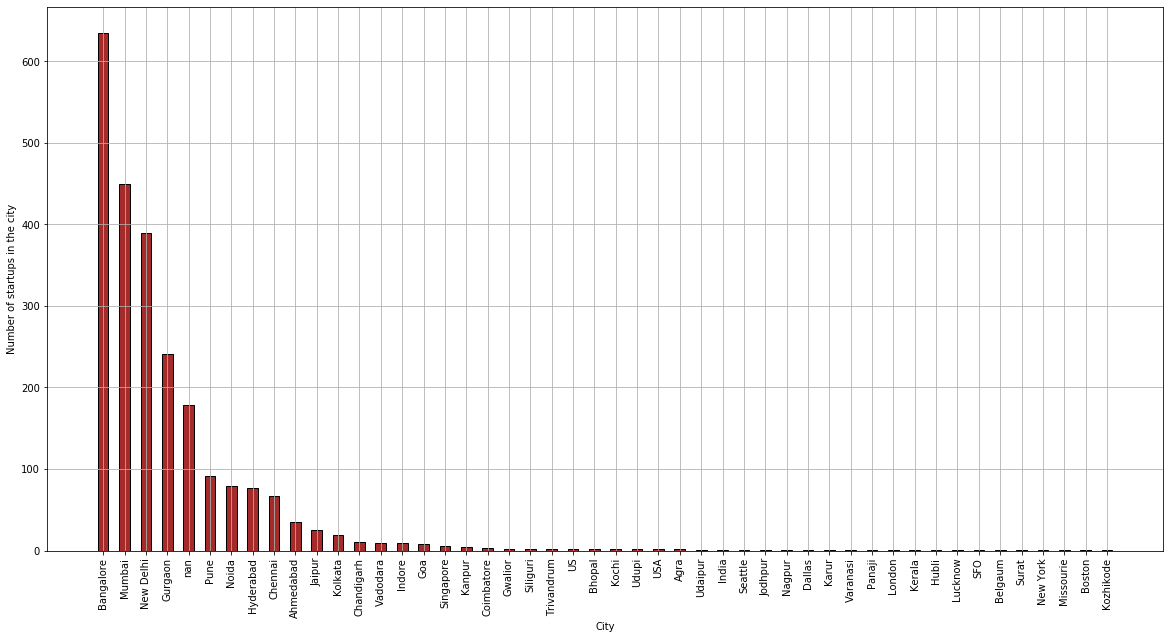

Best Location to establish Product startup is Bangalore


In [4]:
startup = data_frame
#Dataset cleaning
startup.CityLocation = startup["CityLocation"].apply(seperateCity)
startup.CityLocation.replace("Delhi","New Delhi",inplace=True)
startup.CityLocation.replace("bangalore","Bangalore",inplace=True)
ans = startup.CityLocation.value_counts()
potential_cities = ans.index
city_counts = ans.values
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(potential_cities,city_counts,width = 0.5, color = "brown",edgecolor="black")
plt.xlabel('City')
plt.ylabel('Number of startups in the city')
plt.xticks(rotation=90)
plt.show()
location_suited = ["Bangalore", "Mumbai","Gurgaon","Noida","New Delhi"]
for i in range(len(potential_cities)):
    if potential_cities[i] in location_suited:
        print("Best Location to establish Product startup is",potential_cities[i])
        break

# Finding the potential investors to invest in product startup

In [5]:
#Function to extract the investors name and their investment count and store them in dictionary 
def createdictionary(array):
    d = {}
    for value in array:
        if ',' not in value:
            d[value] = d.get(value, 0) + 1
        else:
            string = value.strip().split(',')
            for j in string:
                val = j.strip()
                d[val] = d.get(val, 0) + 1
    return d

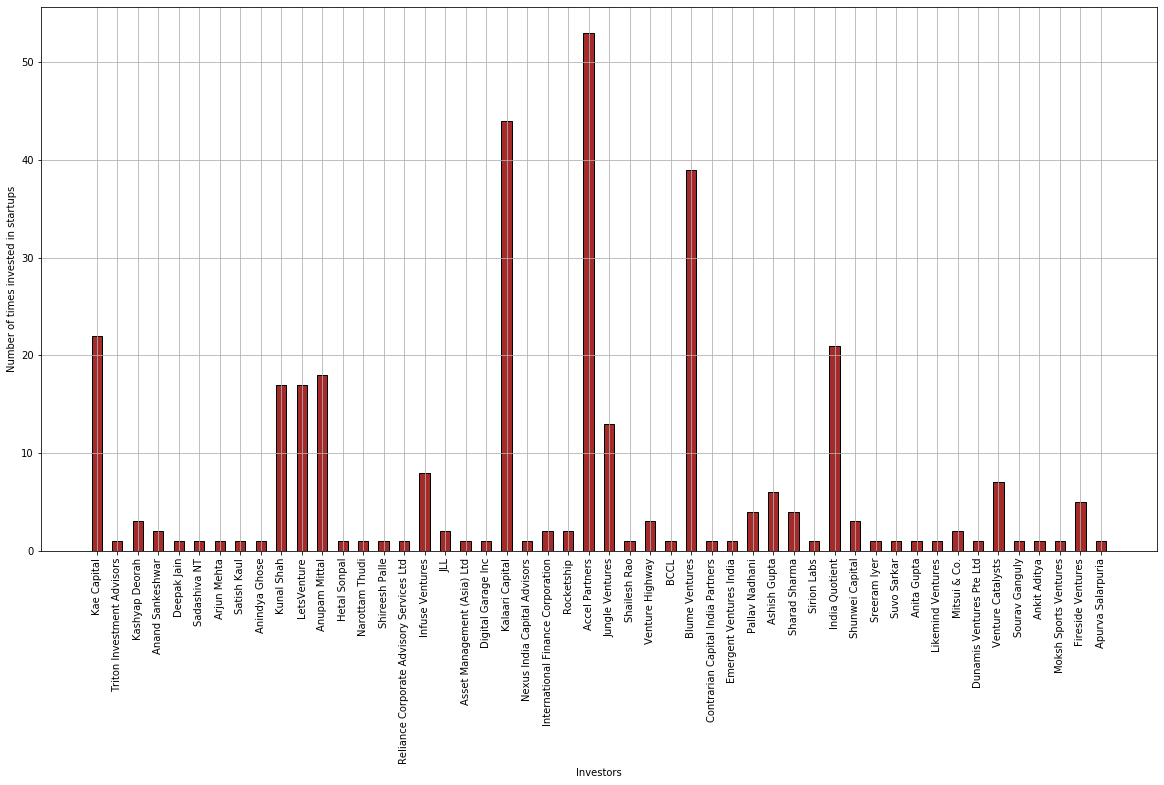

Top5 potential investors:-
Sequoia Capital invested 64 times in startups
Accel Partners invested 53 times in startups
Kalaari Capital invested 44 times in startups
SAIF Partners invested 41 times in startups
Indian Angel Network invested 40 times in startups


In [6]:
startup = data_frame
startup.InvestorsName.dropna(inplace=True)
dic = createdictionary(startup.InvestorsName)
investors = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(list(dic.keys())[0:50],list(dic.values())[0:50],width = 0.5, color = "brown",edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel('Investors')
plt.ylabel('Number of times invested in startups')
plt.show()
#Printing top5 potential investors
print("Top5 potential investors:-")
for i in range(5):
    print(investors[i][0],"invested",investors[i][1],"times in startups")

# Finding the potential investors (that invested in different startups not same startup) to invest in product startup

In [7]:
#function to find investors invested in different startups
def different_investors(startup):
    d ={}
    for ind in startup.index:
        value = str(startup['InvestorsName'][ind])
        company = str(startup['StartupName'][ind])
        if ',' not in value:
            if value in d:
                if company not in d[value]:
                    d[value].append(company)
            else:
                d[value] = []
                d[value].append(company)
        else:
            string = value.strip().split(',')
            for j in string:
                val = j.strip()
                if val in d:
                    if company not in d[val]:
                        d[val].append(company)
                else:
                    d[val] = []
                    d[val].append(company)
    return d

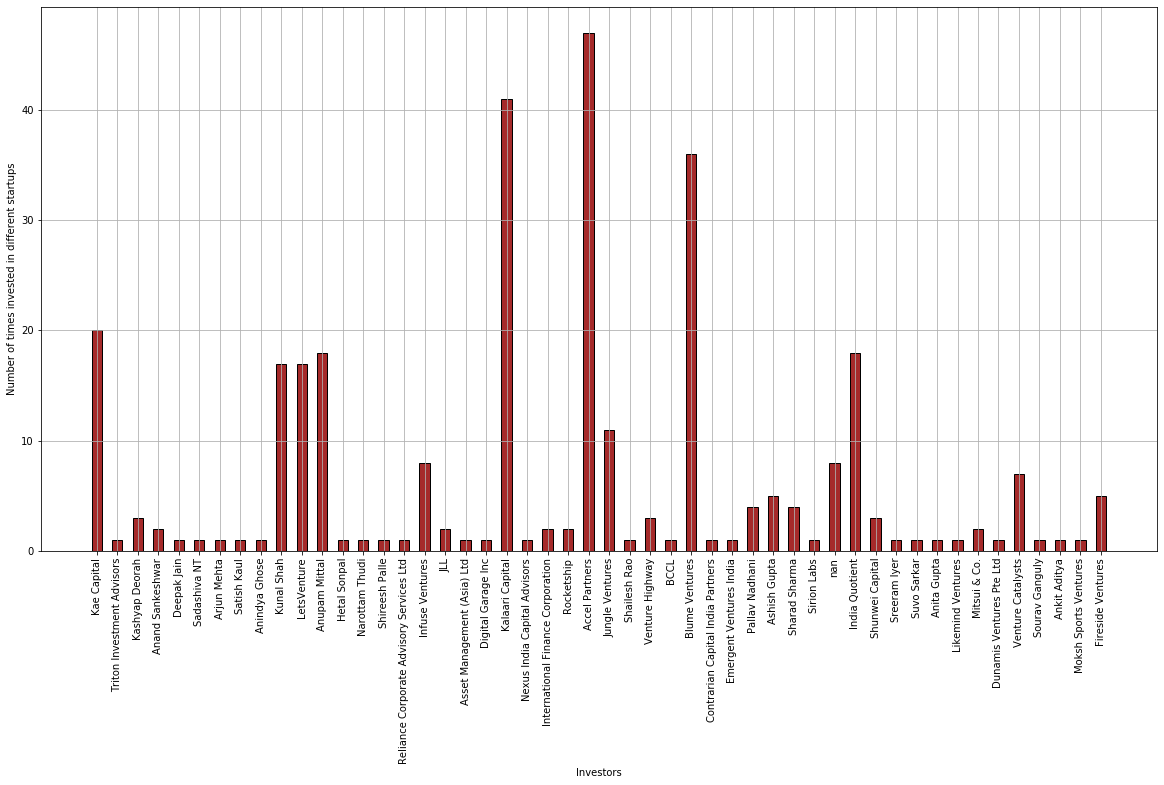

Top5 potential investors:-
Sequoia Capital invested in 48 different startups
Accel Partners invested in 47 different startups
Kalaari Capital invested in 41 different startups
Indian Angel Network invested in 40 different startups
Blume Ventures invested in 36 different startups


In [8]:
# Some investors have invested in the same startup at different number of funding rounds. So improvising the list that gives 
#potential investors who have invested in different number of startups. 
startup = data_frame
startup.InvestorsName.dropna(inplace=True)
startup.replace('OyoRooms','Oyo',inplace=True)
startup.replace('Oyorooms','Oyo',inplace=True)
startup.replace('Oyo Rooms','Oyo',inplace=True)
startup.replace('OYO Rooms','Oyo',inplace=True)
startup.replace('Ola Cabs','Ola',inplace=True)
startup.replace('Olacabs','Ola',inplace=True)
startup.replace('Flipkart.com','Flipkart',inplace=True)
startup.replace('Paytm Marketplace','Paytm',inplace=True)
d = different_investors(startup)
ansdic ={}
for i in d:
    ansdic[i] = len(d[i])
del ansdic['']
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(list(ansdic.keys())[0:50],list(ansdic.values())[0:50],width = 0.5, color = "brown",edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel('Investors')
plt.ylabel('Number of times invested in different startups')
plt.show()
ans = sorted(ansdic.items(), key=operator.itemgetter(1), reverse=True)
print("Top5 potential investors:-")
for i in range(5):
    print(ans[i][0],"invested in",ans[i][1],"different startups")

# Finding the potential investors (that invested in different startups not same startup) to invest in product startup which is in early phase

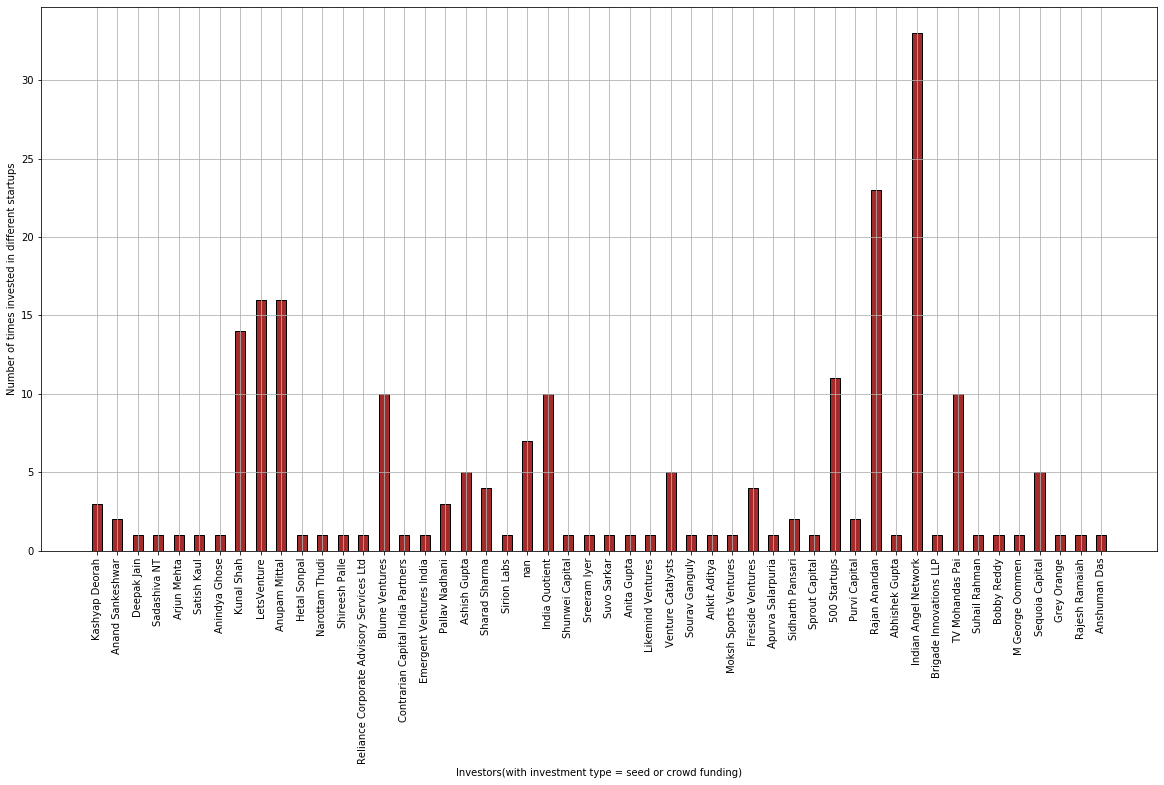

Top5 potential investors (with investment type = seed or crowd funding):-
Indian Angel Network invested in 33 different startups
Rajan Anandan invested in 23 different startups
LetsVenture invested in 16 different startups
Anupam Mittal invested in 16 different startups
Kunal Shah invested in 14 different startups


In [10]:
#For early stage startups it is essential to find investor whose investment type is seed funding or crowd funding
startup = data_frame
startup.InvestmentType.replace("SeedFunding", "Seed Funding", inplace=True)
startup.InvestmentType.replace("Crowd funding", "Crowd Funding", inplace=True)
#df.InvestmentType.replace("PrivateEquity", "Private Equity", inplace=True)
seed = startup[startup.InvestmentType == "Seed Funding"]
crowd = startup[startup.InvestmentType == "Crowd Funding"]
startup = pd.concat([seed, crowd])
startup.replace('OyoRooms','Oyo',inplace=True)
startup.replace('Oyorooms','Oyo',inplace=True)
startup.replace('Oyo Rooms','Oyo',inplace=True)
startup.replace('OYO Rooms','Oyo',inplace=True)
startup.replace('Ola Cabs','Ola',inplace=True)
startup.replace('Olacabs','Ola',inplace=True)
startup.replace('Flipkart.com','Flipkart',inplace=True)
startup.replace('Paytm Marketplace','Paytm',inplace=True)
d = different_investors(startup)
ansdic ={}
for i in d:
    ansdic[i] = len(d[i])
del ansdic['']
del ansdic['Undisclosed Investors']
del ansdic['Undisclosed investors']
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(list(ansdic.keys())[0:50],list(ansdic.values())[0:50],width = 0.5, color = "brown",edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel('Investors(with investment type = seed or crowd funding)')
plt.ylabel('Number of times invested in different startups')
plt.show()
ans = sorted(ansdic.items(), key=operator.itemgetter(1), reverse=True)
print("Top5 potential investors (with investment type = seed or crowd funding):-")
for i in range(5):
    print(ans[i][0],"invested in",ans[i][1],"different startups")

# Finding the potential investors (that invested in different startups not same startup) to invest in product startup which is in operational phase

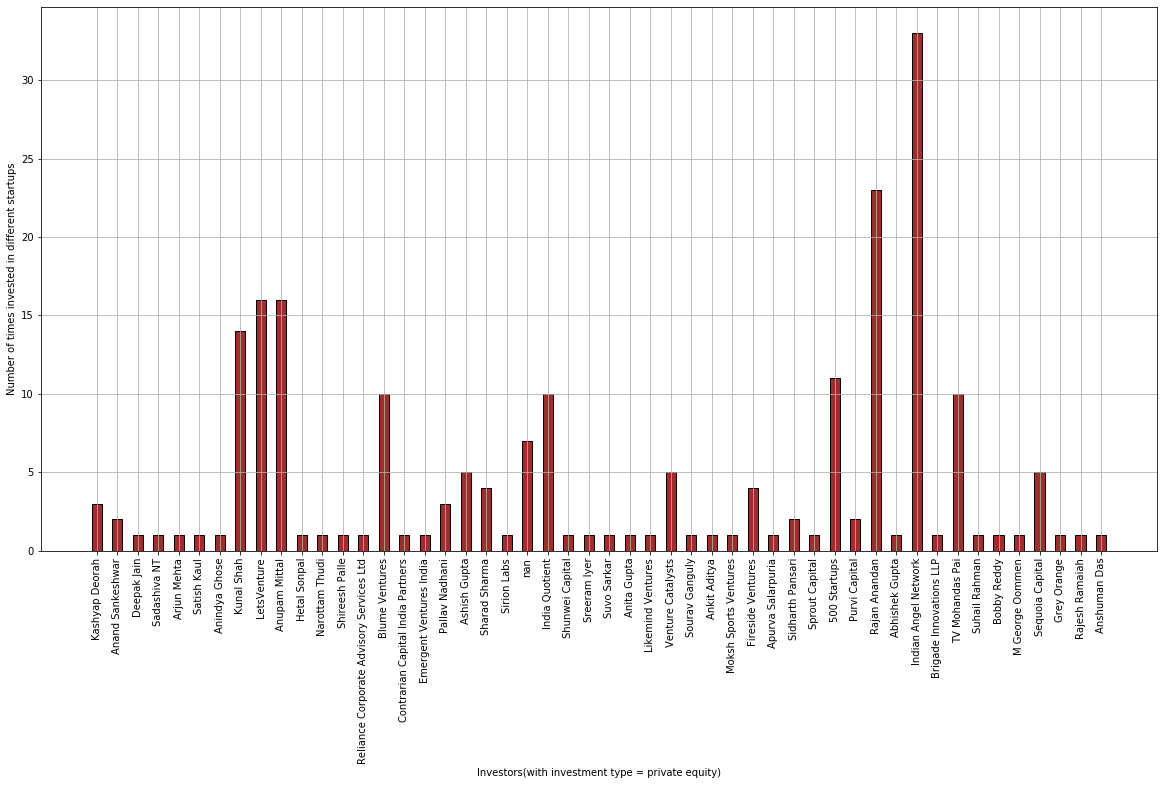

Top5 potential investors (with investment type = private equity):-
Indian Angel Network invested in 33 different startups
Rajan Anandan invested in 23 different startups
LetsVenture invested in 16 different startups
Anupam Mittal invested in 16 different startups
Kunal Shah invested in 14 different startups


In [11]:
# After the product startup is operational mode we need investors whose investement type is private equity
startup = data_frame
startup.InvestmentType.replace("PrivateEquity", "Private Equity", inplace=True)
startup = startup[startup.InvestmentType == "Private Equity"]
startup = pd.concat([seed, crowd])
startup.replace('OyoRooms','Oyo',inplace=True)
startup.replace('Oyorooms','Oyo',inplace=True)
startup.replace('Oyo Rooms','Oyo',inplace=True)
startup.replace('OYO Rooms','Oyo',inplace=True)
startup.replace('Ola Cabs','Ola',inplace=True)
startup.replace('Olacabs','Ola',inplace=True)
startup.replace('Flipkart.com','Flipkart',inplace=True)
startup.replace('Paytm Marketplace','Paytm',inplace=True)
d = different_investors(startup)
ansdic ={}
for i in d:
    ansdic[i] = len(d[i])
del ansdic['']
del ansdic['Undisclosed Investors']
del ansdic['Undisclosed investors']
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(list(ansdic.keys())[0:50],list(ansdic.values())[0:50],width = 0.5, color = "brown",edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel('Investors(with investment type = private equity)')
plt.ylabel('Number of times invested in different startups')
plt.show()
ans = sorted(ansdic.items(), key=operator.itemgetter(1), reverse=True)
print("Top5 potential investors (with investment type = private equity):-")
for i in range(5):
    print(ans[i][0],"invested in",ans[i][1],"different startups")
